In [1]:
import pandas as pd


In [2]:
cities = ["Kraków", "Warszawa", "Poznań", "Wrocław", "Gdańsk", "Szczecin"]

In [3]:
connections_df = pd.DataFrame({
    "from": cities,
    "to": cities[::-1]
})
connections_df


,from,to
0,Kraków,Szczecin
1,Warszawa,Gdańsk
2,Poznań,Wrocław
3,Wrocław,Poznań
4,Gdańsk,Warszawa
5,Szczecin,Kraków


### One-hot encoding

In [4]:
pd.get_dummies(connections_df)

,from_Gdańsk,from_Kraków,from_Poznań,from_Szczecin,from_Warszawa,from_Wrocław,to_Gdańsk,to_Kraków,to_Poznań,to_Szczecin,to_Warszawa,to_Wrocław
0,False,True,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,True,False,False,False,False


In [6]:
companies_df = pd.read_csv(".\\data\\2_4_companies.csv")
companies_df

,company_name,company_address
0,Digitdeck,Al. Marszałka Józefa Piłsudskiego 31 90-306 Łódź
1,Scout Course,ul. Białobrzeska 50 02-371 Warszawa
2,Discover Clothes,ul. Bytomska 65 41-605 Świętochłowice


In [7]:
companies_df["company_address"].str.extract(r"([0-9]{2}\-[0-9]{3})")

,0
0,90-306
1,02-371
2,41-605


In [8]:
cities_df = pd.read_csv(".\\data\\2_4_cities.csv")

In [9]:
cities_df

,city
0,Lublin
1,Warszawa
2,Łódź
3,Kraków
4,Wrocław
5,Świętochłowice
6,Poznań
7,Szczecin
8,Gdańsk
9,Rzeszów


In [10]:
def find_matching_city(value):
    value_lc = value.lower()
    for city_name in cities_df["city"]:
        if city_name.lower() in value_lc:
            return city_name
    return None

In [11]:
companies_df["company_address"].map(find_matching_city)

0              Łódź
1          Warszawa
2    Świętochłowice
Name: company_address, dtype: object

In [12]:
date_range = pd.date_range("2020-03-29", periods=60, freq="D")

days_df = pd.DataFrame({
    "year": date_range.year,
    "month": date_range.month,
    "day": date_range.day,
    "day_of_week": date_range.dayofweek
})
days_df.head(7)

,year,month,day,day_of_week
0,2020,3,29,6
1,2020,3,30,0
2,2020,3,31,1
3,2020,4,1,2
4,2020,4,2,3
5,2020,4,3,4
6,2020,4,4,5


In [13]:
import numpy as np

In [15]:
date_range.view(np.int64)

array([1585440000000000000, 1585526400000000000, 1585612800000000000,
       1585699200000000000, 1585785600000000000, 1585872000000000000,
       1585958400000000000, 1586044800000000000, 1586131200000000000,
       1586217600000000000, 1586304000000000000, 1586390400000000000,
       1586476800000000000, 1586563200000000000, 1586649600000000000,
       1586736000000000000, 1586822400000000000, 1586908800000000000,
       1586995200000000000, 1587081600000000000, 1587168000000000000,
       1587254400000000000, 1587340800000000000, 1587427200000000000,
       1587513600000000000, 1587600000000000000, 1587686400000000000,
       1587772800000000000, 1587859200000000000, 1587945600000000000,
       1588032000000000000, 1588118400000000000, 1588204800000000000,
       1588291200000000000, 1588377600000000000, 1588464000000000000,
       1588550400000000000, 1588636800000000000, 1588723200000000000,
       1588809600000000000, 1588896000000000000, 1588982400000000000,
       1589068800000

In [16]:
days_in_week = 7

In [17]:
days_df.insert(loc=4, column="day_of_week_sin",
               value=np.sin(2*np.pi*days_df["day_of_week"]/days_in_week))
days_df.insert(loc=5,column="day_of_week_cos",value=np.cos(2*np.pi*days_df["day_of_week"]/days_in_week))
days_df.head(7)

,year,month,day,day_of_week,day_of_week_sin,day_of_week_cos
0,2020,3,29,6,-0.781831,0.623490
1,2020,3,30,0,0.000000,1.000000
2,2020,3,31,1,0.781831,0.623490
3,2020,4,1,2,0.974928,-0.222521
4,2020,4,2,3,0.433884,-0.900969
5,2020,4,3,4,-0.433884,-0.900969
6,2020,4,4,5,-0.974928,-0.222521


In [20]:
import  matplotlib.pyplot as plt

<Axes: >

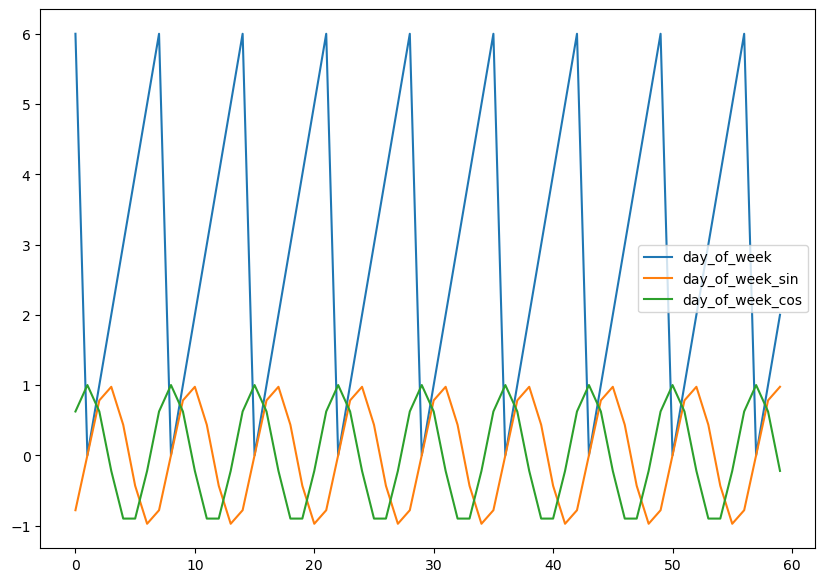

In [21]:
days_df[["day_of_week", "day_of_week_sin", "day_of_week_cos"]].plot(figsize=(10.0, 7.0))

<Axes: xlabel='day_of_week_sin', ylabel='day_of_week_cos'>

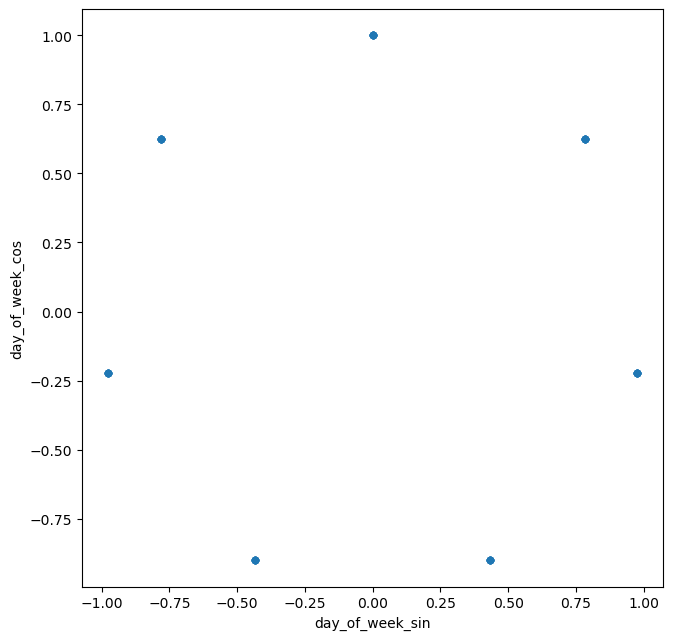

In [22]:
days_df.plot.scatter("day_of_week_sin", "day_of_week_cos", figsize=(7.5, 7.5))